In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import MultipleLocator

In [32]:
training_data = pd.read_csv("house-prices-advanced-regression-techniques/train.csv", index_col="Id")

column_to_remove = list(training_data.select_dtypes(include=['category','object']))
training_data = training_data.drop(column_to_remove, axis=1)
training_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


In [33]:
training_data.loc[training_data['LotFrontage'].isna() , 'LotFrontage'] = 0
training_data.loc[training_data['GarageYrBlt'].isna() , 'GarageYrBlt'] = 0
training_data.loc[training_data['MasVnrArea'].isna() , 'MasVnrArea'] = 0

training_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


In [34]:
columns_has_null = training_data.isna().sum().sort_values(ascending=False)
columns_has_null[columns_has_null > 0]

Series([], dtype: int64)

# Testing training data on the training dataset with a 0.75 to 0.25 ratio training data - testing data

In [35]:
X = training_data.iloc[:, :-1]
y = training_data.iloc[:, -1:]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, train_size=0.75)

In [37]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

C:\Users\ianpe\AppData\Local\Temp\ipykernel_4452\3799881120.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


RandomForestRegressor()

In [38]:
print("model score on training data:", forest.score(X_train, y_train))

model score on training data: 0.9760195385120144


In [39]:
print("model score on test data:", forest.score(X_test, y_test))

model score on test data: 0.8915838900448354


# Matrix

<AxesSubplot:>

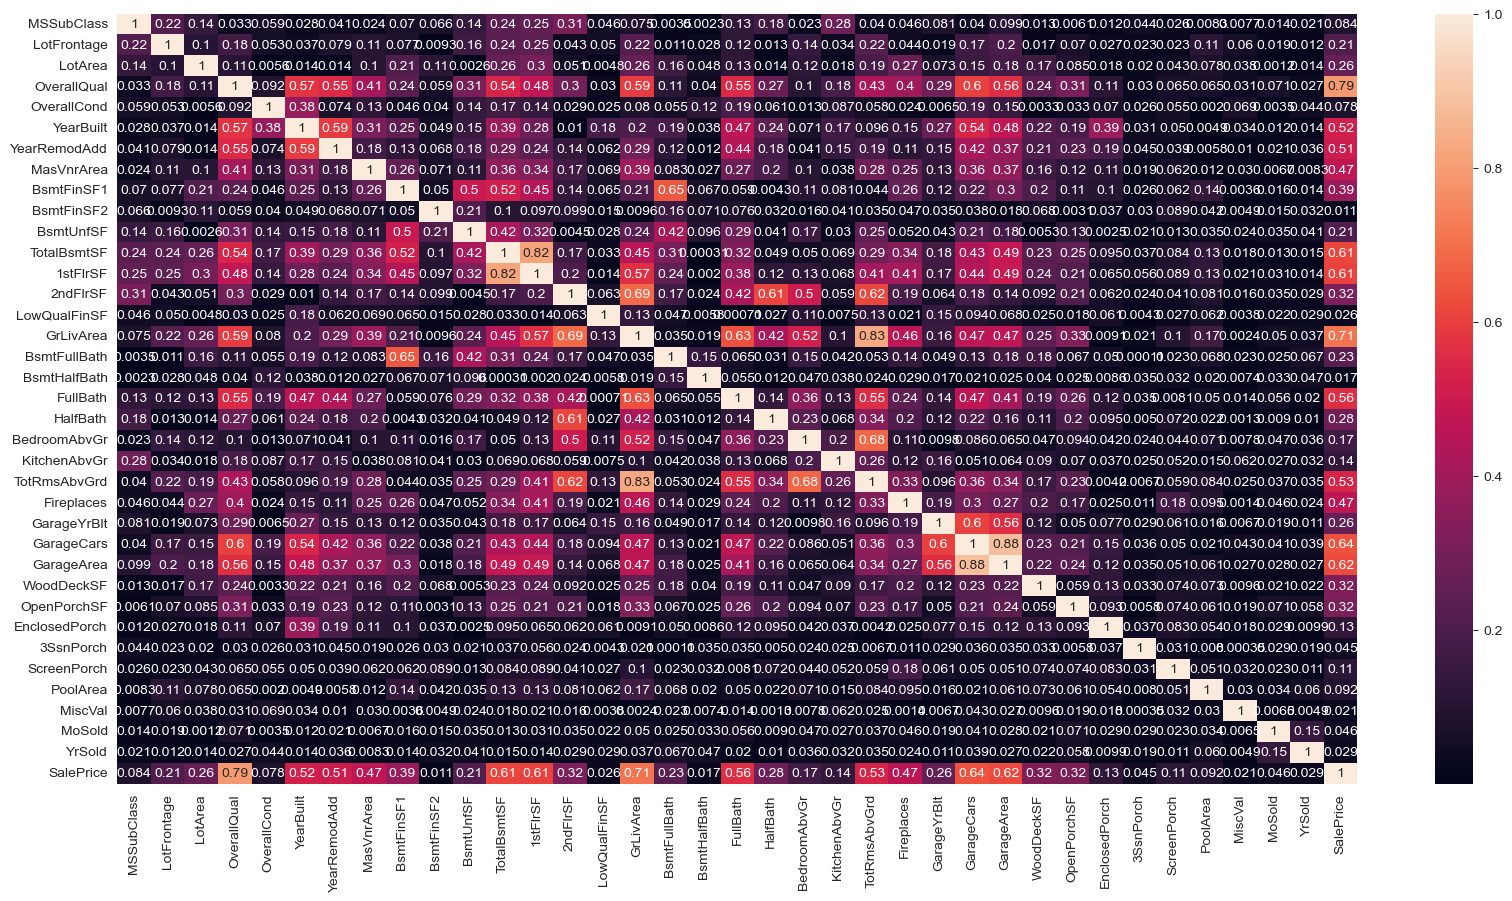

In [40]:
plt.figure(figsize=(20, 10))
sns.heatmap(training_data.corr().abs(),  annot=True)

In [41]:
matrix = training_data.corr().abs()
columns_to_keep = matrix.iloc[-1, :]>=0.6
rows_to_keep = matrix.iloc[:, -1]>=0.6
new_matrix = matrix.loc[rows_to_keep, columns_to_keep]
new_matrix.shape

(7, 7)

<AxesSubplot:>

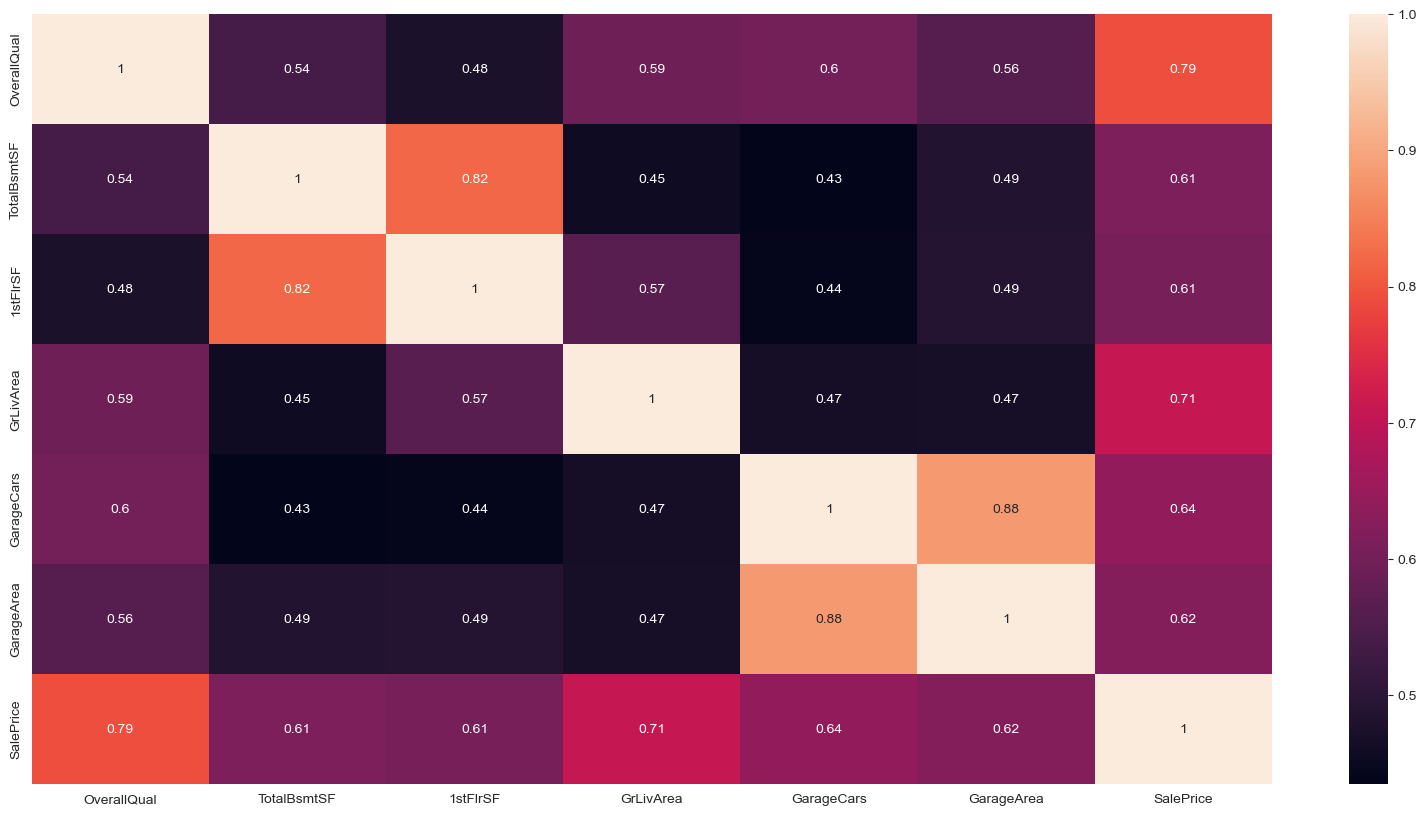

In [42]:
plt.figure(figsize=(20,10))
sns.heatmap(new_matrix,  annot=True)

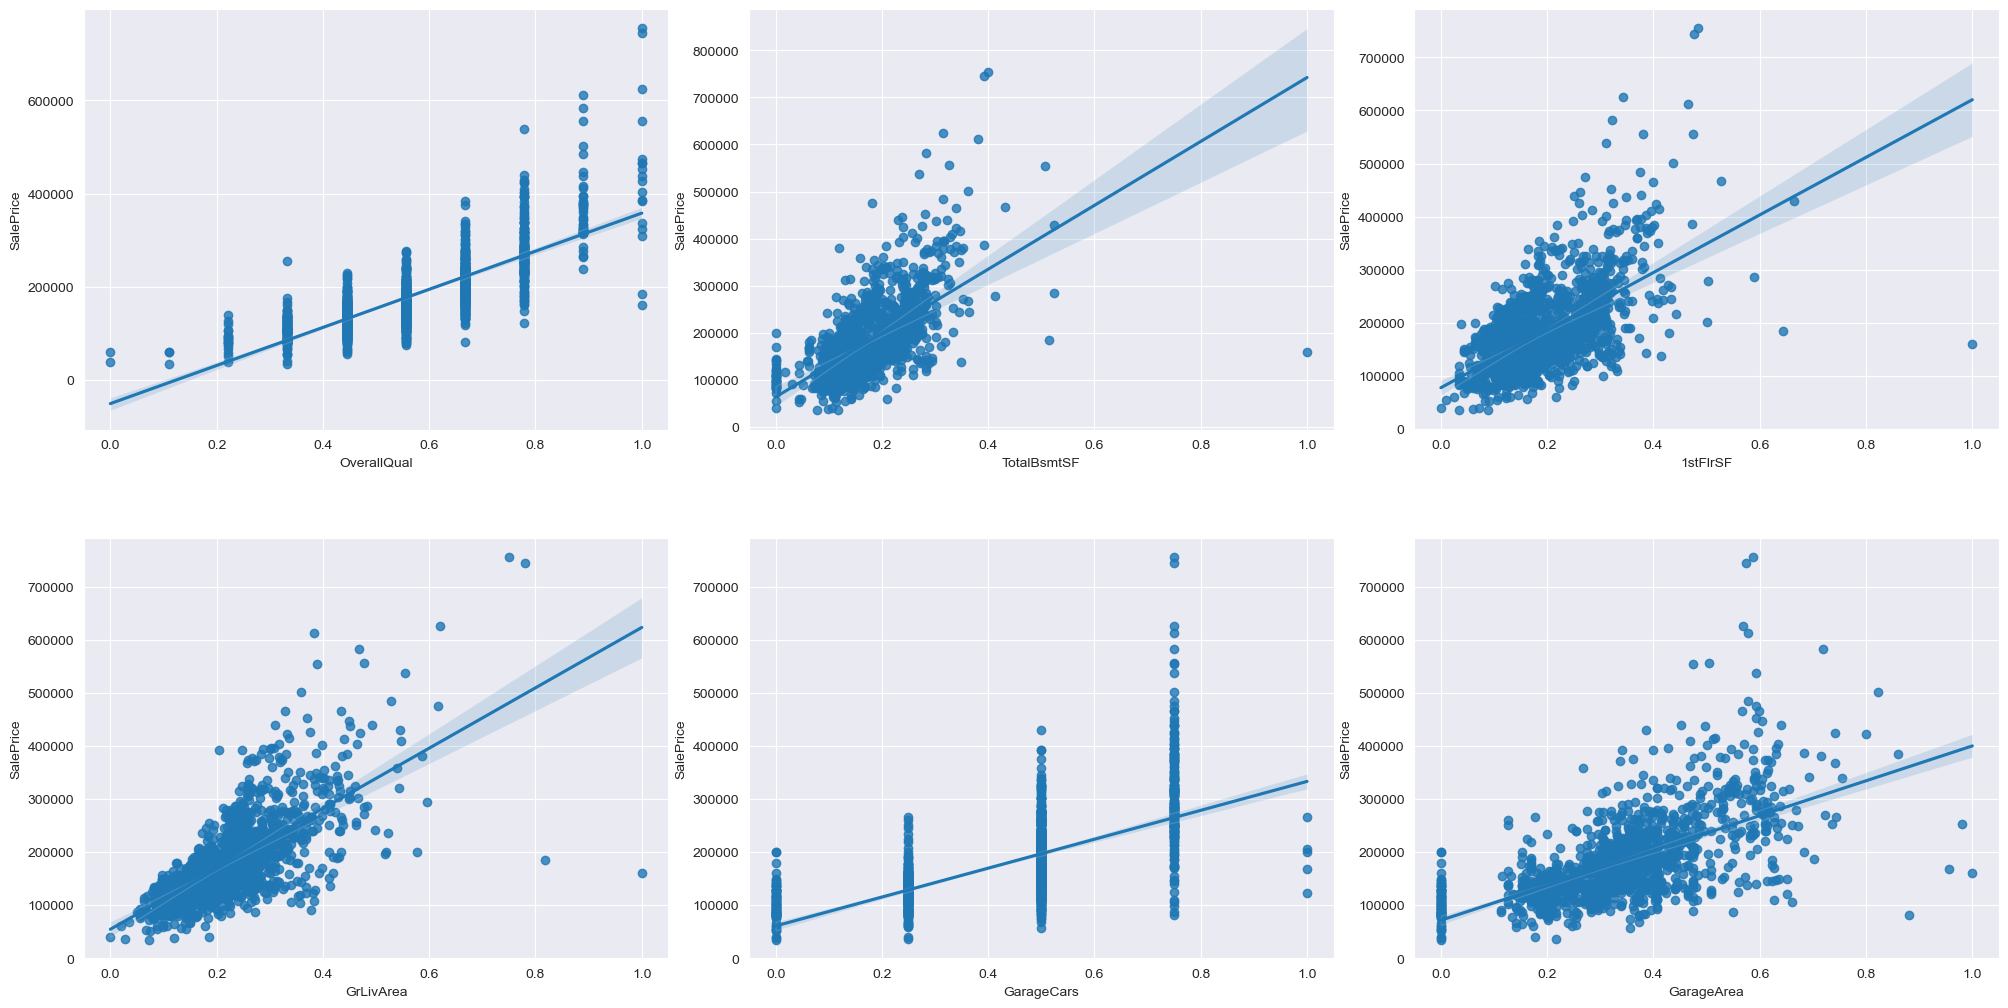

In [45]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']
x = training_data.loc[:,column_sels]
y = training_data['SalePrice']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)